In [2]:
# Collect 10 sentences as a corpus 
# Make a word vectors of this corpus

corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [3]:
# Remove Stop word. The words which are more frequent in sentence are called stop word, i.e. is,a,the,will

def remove_stop_words(corpus):
    stop_words = ['is','a','will','be']
    results = []
    #print(corpus)
    for sentence in corpus:
        words_in_sentence = sentence.split(' ')
        for stp_w in stop_words:
            if stp_w in words_in_sentence:
                words_in_sentence.remove(stp_w)
        results.append(" ".join(words_in_sentence))
        
    return results


In [12]:
corpus = remove_stop_words(corpus)
corpus

# make a word list with unique value
word_list = []
for sentence in corpus:
    for word in sentence.split(' '):
        word_list.append(word)

word_list = set(word_list) 
#word_list

In [20]:
# Generation of data.

word2int = {}
for i,word in enumerate(word_list):
    word2int[word] = i
    
#word2int

# generate multidimentional array. it contains word of each sentence in a array.
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

# Findout neighbors of window size 2.
WINDOW_SIZE = 2
data = []
for sentence in sentences:    
    for idx, word in enumerate(sentence):
#         print(idx,word)
#         print(sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1])
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
#data

In [21]:
#preparing Dataframe using panda
import pandas as pd

# for text in corpus:
#     print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])
df

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [28]:
# Gererate one hot encoding for every piece of data (input, label)
import tensorflow as tf
import numpy as np

ONE_HOT_ENCODE = len(word_list)

# function for generating one hot encoding
def one_hot_encoding(word_index):
    one_hot_encoding = np.zeros(ONE_HOT_ENCODE)
    one_hot_encoding[word_index] = 1 #place 1 for the specified word
    return one_hot_encoding

X = [] # input array
Y = [] # target array

for x,y in zip(df['input'],df['label']):
    X.append(one_hot_encoding(word2int[x]))
    Y.append(one_hot_encoding(word2int[y]))
    
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_ENCODE))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_ENCODE))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_ENCODE, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_ENCODE]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


In [44]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 40000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 4000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.09279
iteration 4000 loss is :  1.82113
iteration 8000 loss is :  1.78309
iteration 12000 loss is :  1.76641
iteration 16000 loss is :  1.75574
iteration 20000 loss is :  1.74787
iteration 24000 loss is :  1.74161
iteration 28000 loss is :  1.73641
iteration 32000 loss is :  1.73198
iteration 36000 loss is :  1.72815


In [45]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-1.1093421   2.51013851]
 [-0.35695314 -0.50347781]
 [-0.16430259  0.07958728]
 [-0.93697882 -0.3948139 ]
 [ 0.03043914  0.99716526]
 [-2.9787364  -1.01331115]
 [-6.2833333  -1.90549111]
 [-0.14199638  0.8414039 ]
 [-6.88012171 -2.92968702]
 [-2.35276842 -1.27732062]
 [-2.87664843  8.0470686 ]
 [-0.65336555  2.86244845]]


In [46]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = word_list
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,boy,-1.109342,2.510139
1,woman,-0.356953,-0.503478
2,young,-0.164303,0.079587
3,queen,-0.936979,-0.394814
4,man,0.030439,0.997165
5,girl,-2.978736,-1.013311
6,pretty,-6.283333,-1.905491
7,king,-0.141996,0.841404
8,wise,-6.880122,-2.929687
9,princess,-2.352768,-1.277321


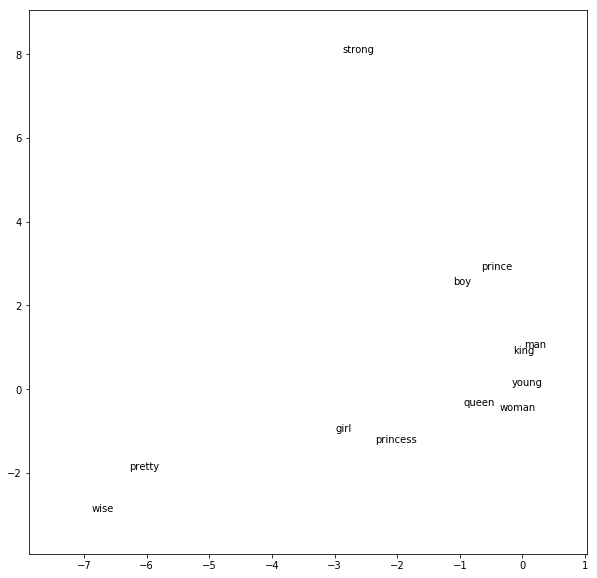

In [47]:
#word vector in 2d chart. Graphically showing how words are similar to each other

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()